In [1]:
pip install emoji contractions nltk -U scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 18.0 MB/s 
     |████████████████████████████████| 287 kB 65.5 MB/s 
     |████████████████████████████████| 106 kB 65.8 MB/s 
  Created wheel for emoji: filename=emoji-2.0.0-py3-none-any.whl size=193022 sha256=42305d5d9d521d7fb12994939438214e775b8ea4d7858b433e573c035b1dbec5
  Stored in directory: /root/.cache/pip/wheels/ec/29/4d/3cfe7452ac7d8d83b1930f8a6205c3c9649b24e80f9029fc38
Successfully built emoji


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import emoji
import re
import contractions
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk.stem.snowball import SnowballStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
snowball_stemmer=SnowballStemmer('english')

In [4]:
def replace_tweet(tweet,default_replace='',twitter_user='twitter_user',stemmer=snowball_stemmer):
  tokens_list=[]
  for k,v in contractions.contractions_dict.items():
    tweet=tweet.replace(k,v) 
  tweet=re.sub('RT\s+',default_replace,tweet)
  tweet= re.sub('\B@\w+',twitter_user,tweet)
  tweet=emoji.demojize(tweet)
  tweet=re.sub('(http|https):\/\/\S+',default_replace,tweet)
  tweet=re.sub('#+',default_replace,tweet)

  tweet=tweet.lower()
  tweet=re.sub(r'(.)\1+',r'\1\1',tweet)
  tweet=re.sub(r'[\?\.\,\!\n]+(?=[\?\.\,\!\n])',default_replace,tweet)
  tweet=re.sub('\n',default_replace,tweet)
  token=word_tokenize(tweet)

  for tokens in token:
    tokens_list.append(stemmer.stem(tokens))
  return tokens_list

Pre-Process text

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Data science Data files/Twitter/twitter_training.csv')

In [6]:
#Renaming the columns
df.rename(columns = {'Borderlands':'Topic', 'Positive':'Sentiment','im getting on borderlands and i will murder you all ,':'Review'}, inplace = True)

In [7]:
# To turn all reviews into str

df["Review"] = df["Review"].astype(str)
df["Review"] = [x.replace(':',' ') for x in df["Review"]]

In [8]:
df = df[df.Sentiment != 'Neutral']
df=df[df.Sentiment != 'Irrelevant']

In [9]:
df['Review_sentiment']=df['Sentiment'].apply(lambda x: 1 if x == 'Positive' else 0)

In [10]:
df['tokens']=df['Review'].apply(replace_tweet)


In [11]:
df.head()


,2401,Topic,Sentiment,Review,Review_sentiment,tokens
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,1,"[i, am, come, to, the, border, and, i, will, k..."
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,1,"[im, get, on, borderland, and, i, will, kill, ..."
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,1,"[im, come, on, borderland, and, i, will, murde..."
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,1,"[im, get, on, borderland, 2, and, i, will, mur..."
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,1,"[im, get, into, borderland, and, i, can, murde..."


Sentiment Analysis

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [13]:
def fit_lr(X_train,y_train):
  model=LogisticRegression(max_iter=1000)
  model.fit(X_train,y_train)
  return model

In [14]:
def fit_tfidf(tweet_corpus):
  tf_vect=TfidfVectorizer(tokenizer=lambda x: x
                          ,preprocessor=lambda x:x)
  tf_vect.fit(tweet_corpus)
  return tf_vect

In [15]:
x=df['tokens']
y=df['Review_sentiment']

In [16]:
X_train,X_test,y_train,y_test=train_test_split(x,y,
                                               random_state=11,
                                               train_size=0.8)

In [17]:
tf=fit_tfidf(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [18]:
X_train_tf=tf.transform(X_train)
X_test_tf=tf.transform(X_test)

In [19]:
model_lr_tf=fit_lr(X_train_tf,y_train)

In [20]:
y_pred_lr_tfidf=model_lr_tf.predict(X_test_tf)

In [21]:
accuracy_score(y_test,y_pred_lr_tfidf)

0.8721613832853026

Game review Sentiment prediction

In [38]:
all_tables=pd.read_csv('/content/drive/MyDrive/Data science Data files/Customer Review/all_tables_joined_final.csv',index_col=0)

In [40]:
#all_tables=all_tables.drop('Tokenized2',axis=1)

In [ ]:
all_tables['Negative']=all_tables[]

In [90]:
all_tables.head(5)

,review_id,author steamid,language,review,app_name,author num_reviews,author playtime_forever,author playtime_last_two_weeks,author playtime_at_review,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,Tokenized,sentiment_prediction,Score,Negative
0,17100616,76561198064239298,english,This game is amazing. Tired of games that you ...,Darkest DungeonÂ®,34,1324.0,0.0,732.0,1,20,6,0.559422,0,"['tis', 'game', 'is', 'amaz', '.', 'tire', 'of...",1,80.6,0
1,17100401,76561197976591718,english,This game has the feeling of a moblie game and...,Darkest DungeonÂ®,1,954.0,0.0,954.0,0,0,0,0.445860,0,"['tis', 'game', 'as', 'te', 'feel', 'of', 'a',...",1,95.4,0
2,17100396,76561198105659850,english,I deleted my previous review from 2017 because...,Darkest DungeonÂ®,9,2009.0,0.0,1078.0,1,0,0,0.000000,0,"['i', 'delet', 'my', 'previous', 'review', 'fr...",1,108.0,0
3,17100313,76561197987572281,english,When I first saw this game I figured it was ju...,Darkest DungeonÂ®,32,2377.0,0.0,1727.0,1,26,5,0.545156,1,"['wen', 'i', 'first', 'saw', 'tis', 'game', 'i...",1,181.9,0
4,17100298,76561198123805025,english,I would kill myself how many times i would lik...,Darkest DungeonÂ®,14,788.0,0.0,414.0,1,0,1,0.000000,0,"['i', 'would', 'kill', 'myself', 'ow', 'mani',...",1,41.8,0


In [44]:
x=all_tables['Tokenized']
X_train_tf=tf.transform(x)

In [45]:
y_pred_testdata=model_lr_tf.predict(X_train_tf)

In [51]:
all_tables['sentiment_prediction']=y_pred_testdata

In [52]:
all_tables['sentiment_prediction'].value_counts()

1    167161
0     44982
Name: sentiment_prediction, dtype: int64

Game review data analysis

Data analysis


- We will not be considering authors with only 1 review
- author playtime at review: this will be valued as we assume that players with longer playtime are more credible with their reviews
-recommended: if a review was recommended or not
-votes_funny/votes_helpful: we shall analyze if votes_funny has higher correlation with comment count
-comment count: is an important metrics as it signifies that the review is a discussion starter and is engaging

Ranking the KPIS: (current assumption)

1. Votes helpful -30%
2. votes funny -20%
3. comments - 20%
4. recommended - 20%
5. author playtime at review -10%



In [75]:
def kpi_weights(table,one,two,three,four,five):
  tables=table[one]*.30+table[two]*.20+table[three]*.20+table[four]*.20 +table[five]*.10
  return tables

1. Votes helpful -30%
2. votes funny -20%
3. comments - 15%
4. recommended - 15%
5. author playtime at review -10%
6. author number of games -10%

In [77]:
score=kpi_weights(all_tables,'votes_helpful','votes_funny','comment_count','recommended','author playtime_at_review')

In [78]:
all_tables['Score']=score

In [83]:
#removing 1 hit wonders
all_tables_count=all_tables.groupby('author steamid')['review_id'].count().reset_index()
all_tables_count.sort_values(by='review_id',ascending=False)
all_tables_count_greater_than_1=all_tables_count[all_tables_count['review_id']>1]
all_tables_count_greater_than_1

,author steamid,review_id
3,76561197960269409,2
10,76561197960271994,2
13,76561197960272871,2
230,76561197960437512,2
265,76561197960458147,2
...,...,...
203594,76561199060809763,2
203645,76561199062508201,2
203650,76561199062636841,2
204179,76561199081874912,2


In [86]:
all_tables['Negative']=all_tables['sentiment_prediction'].apply(lambda x: 1 if x==0 else 0)

In [91]:
all_tables_sum=all_tables.groupby('author steamid')['Score','Negative'].sum().reset_index()
all_tables_sum.sort_values(by='Score',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,author steamid,Score,Negative
151764,76561198219691523,858995393.1,0
158730,76561198264553229,858994326.4,0
86792,76561198072356405,858994165.0,0
44525,76561198028967242,858994068.0,0
4648,76561197970439781,858993943.7,0
...,...,...,...
124647,76561198133905226,0.0,0
124595,76561198133807698,0.0,0
49269,76561198035020037,0.0,0
49250,76561198035004513,0.0,0


In [110]:
#all_tables_max=all_tables.groupby('author steamid')['app_name'].max().reset_index()

In [97]:
all_tables_merged=pd.merge(left=all_tables_count_greater_than_1,right=all_tables_sum,on='author steamid',how='inner')

In [111]:
all_tables_merged_final=pd.merge(left=all_tables_max,right=all_tables_merged,on='author steamid',how='inner')

In [112]:
all_tables_merged_final=all_tables_merged_final.sort_values(by='Score',ascending=False)

In [113]:
# to get top customers
def topX(table,top_n):
  topx=table[0:top_n].reset_index()
  topx=topx.drop('index',axis=1)
  print ('The number of author with negative comments are',table[0:top_n]['Negative'].sum(), 'Amongst the top 10,',table[0:10]['Negative'].sum(),'have negative comments')

  return topx

In [114]:
top200=topX(all_tables_merged_final,200)
top200

The number of author with negative comments are 101 Amongst the top 10, 4 have negative comments


,author steamid,app_name,review_id,Score,Negative
0,76561198264553229,For Honor,2,858994326.4,0
1,76561198025472785,Surviving Mars,2,858993940.4,1
2,76561198046494905,SOULCALIBUR VI,2,34029.1,0
3,76561198393005716,For Honor,2,26543.9,0
4,76561198247945392,The Elder Scrolls V: Skyrim Special Edition,2,24012.1,0
...,...,...,...,...,...
195,76561198097159668,The Elder Scrolls V: Skyrim Special Edition,2,3986.7,0
196,76561198202171168,The Elder Scrolls V: Skyrim Special Edition,2,3984.7,0
197,76561198347215484,For Honor,2,3983.9,1
198,76561198197425570,The Elder Scrolls V: Skyrim Special Edition,3,3978.6,1


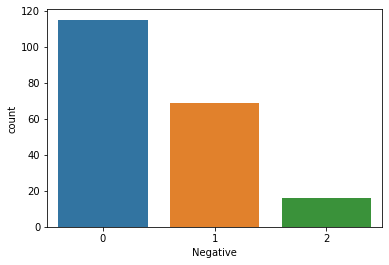

In [115]:
sns.countplot(data=top200,x='Negative')

In [116]:
order=(top200['app_name'].value_counts()).index.tolist()

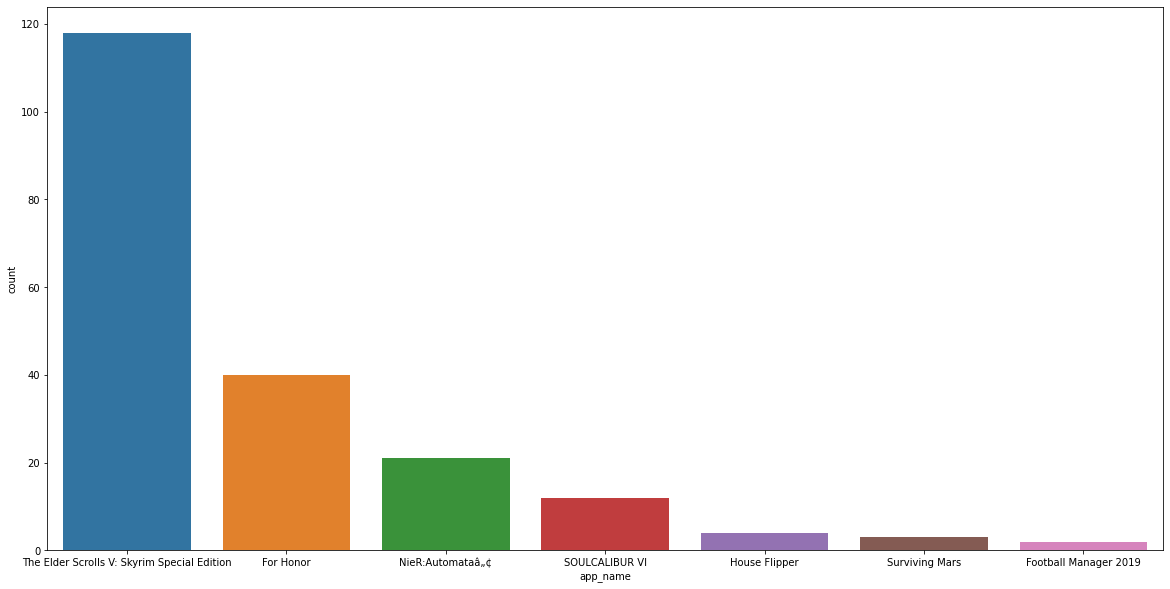

In [119]:
plt.figure(figsize=(20,10))
sns.countplot(data=top200,x='app_name',order=order)

As we can see votes_helpful has the biggest positive correlation to comment count. Which means helpful votes are most engaging. 

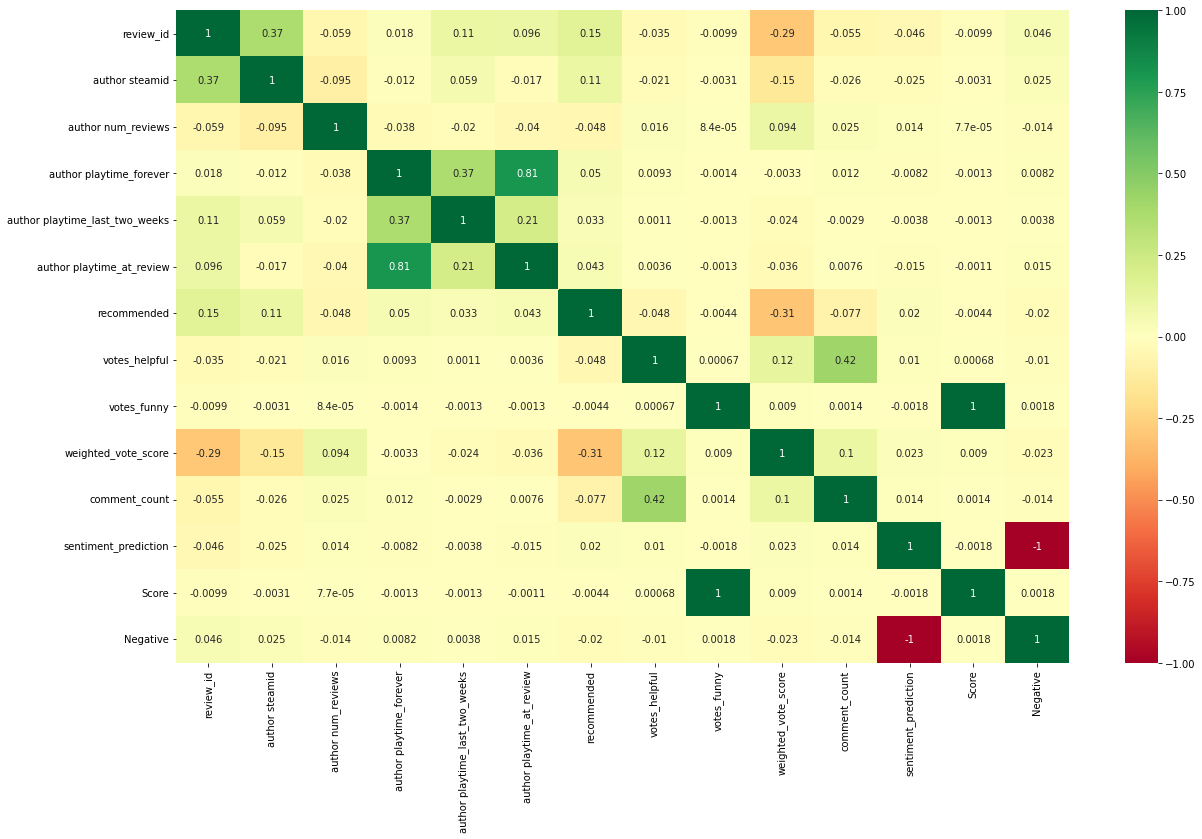

In [109]:
plt.figure(figsize=(20,12))
sns.heatmap(all_tables.corr(),annot=True, cmap='RdYlGn')